In this notebook i will compare calibration results from two sphere wideband calibrations. And the results after ebing process with EK80.

In this notebook the 120 kHz and 200 kHz transduecrs are calibrated with broadband with two spheres each (22 mm and 38.1 mm)

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sphere_ts
import gsw
import math
%matplotlib inline

In [3]:

sns.color_palette("viridis", as_cmap=True)
title_font = {
    'fontname': 'DejaVu Sans', 'size': '15', 'color': 'black',
    'weight': 'medium'
}
axis_font = {'fontname': 'DejaVu Sans', 'size': '13', 'color': 'black'}

In [46]:

palette = sns.color_palette('colorblind')
plt.style.use(['seaborn-colorblind'])
plt.rc('font', family='Arial')
SMALL_SIZE = 12
BIGGER_SIZE = 14
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.direction'] = 'inout'
plt.rcParams['ytick.direction'] = 'inout'
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 3
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 3
plt.rcParams['ytick.major.width'] = 1

one_col = 85 *0.0393701
two_col = 170*0.0393701

savefigs_path= 'F:/AFKABAN/2023_NyÅ_Calibrations/WBAT_253120/120kHz/'

# Function to real xml output

In [5]:
def readxml_cal(filename):
    'Parse calibration results from xml files output by EK80'
    EKcal = pd.read_xml(filename, xpath=".//CalibrationResults")
    
    f = np.fromstring(EKcal.Frequency[0], dtype=float, sep=';')
    g = np.fromstring(EKcal.Gain[0], dtype=float, sep=';')
    mn_bw = np.fromstring(EKcal.BeamWidthAlongship[0], dtype=float, sep=';')
    mj_bw = np.fromstring(EKcal.BeamWidthAthwartship[0], dtype=float, sep=';')
    mn_ao = np.fromstring(EKcal.AngleOffsetAlongship[0], dtype=float, sep=';')
    mj_ao = np.fromstring(EKcal.AngleOffsetAthwartship[0], dtype=float, sep=';')
    
    # Extract theoretical response for reference sphere
    EKref = pd.read_xml(filename, xpath=".//TargetReference")
    
    freq = np.fromstring(EKref.Frequency[0], dtype=float, sep=';')
    ts = np.fromstring(EKref.Response[0], dtype=float, sep=';')
    

    cal_results = {'freq':f, 
                   'gain':g, 
                   'minor_bw':mn_bw,
                   'major_bw':mj_bw,
                   'minor_ao':mn_ao,
                   'major_ao':mj_ao,
                   'ref_freq': freq,
                   'ref_ts': ts
                  }
    return cal_results

In [6]:
def combine_spheres(EKcal_sphere1, EKcal_sphere2, ind_sphere1, ind_sphere2):
    
    EKcombined = {}
    
    for params in ['freq','gain','minor_bw','major_bw','minor_ao','major_ao']:
        EKcombined[params] = np.concatenate((EKcal_sphere1[params][0:ind_sphere1],
                                            EKcal_sphere2[params][ind_sphere2:-1]))

    return EKcombined

# 120 kHz 

In [10]:
EKcal120_38 = readxml_cal('F:/AFKABAN/2023_NyÅ_Calibrations/WBAT_253120/200kHz/CalibrationDataFile-200-38-260123-D20230203-T134859.xml')
EKcal120_22 = readxml_cal('F:/AFKABAN/2023_NyÅ_Calibrations/WBAT_253120/200kHz/CalibrationDataFile-200-22-26012023-D20230203-T151201.xml')

Text(0.5, 0, 'Frequency (Hz)')

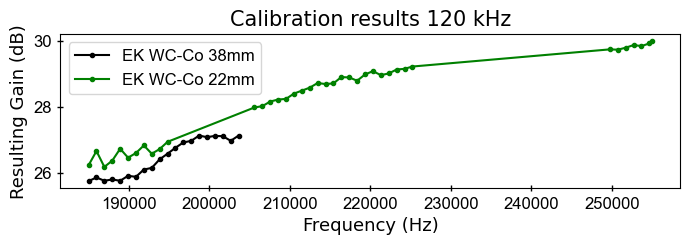

In [11]:
plt.figure(figsize=(8,2))

plt.plot(EKcal120_38['freq'],EKcal120_38['gain'], 'k.-',label='EK WC-Co 38mm')
plt.plot(EKcal120_22['freq'],EKcal120_22['gain'], 'g.-',label='EK WC-Co 22mm')
plt.legend()
plt.title('Calibration results 120 kHz',title_font)
plt.ylabel('Resulting Gain (dB)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)

### Combine spheres

In [33]:
# Set index for which sphere to use for each segment f the spectrum
ind120_22= np.where(EKcal120_22['freq']> EKcal120_38['freq'][-1])[0][0]
ind120_38 = len(EKcal120_38['freq'][:-5])

In [34]:
ind120_22

11

In [35]:
EKboth_120 = combine_spheres(EKcal120_38, EKcal120_22, ind120_38, ind120_22)

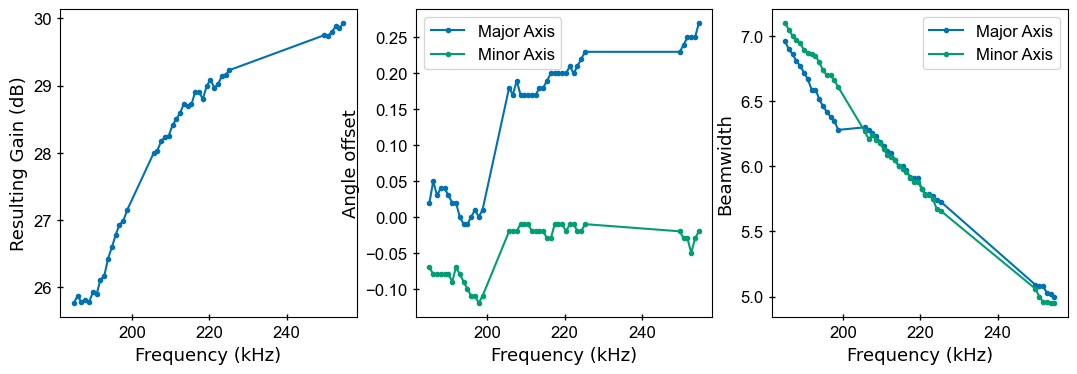

In [36]:
fig, ax = plt.subplots(1,3,figsize=(13,4))

ax[0].plot(EKboth_120['freq']/1000, EKboth_120['gain'], '.-')
ax[0].set_ylabel('Resulting Gain (dB)',axis_font)
ax[0].set_xlabel('Frequency (kHz)',axis_font)

ax[1].plot(EKboth_120['freq']/1000, EKboth_120['major_ao'], '.-', label='Major Axis')
ax[1].plot(EKboth_120['freq']/1000, EKboth_120['minor_ao'], '.-', label='Minor Axis')
ax[1].set_ylabel('Angle offset',axis_font)
ax[1].set_xlabel('Frequency (kHz)',axis_font)
ax[1].legend()

ax[2].plot(EKboth_120['freq']/1000, EKboth_120['major_bw'], '.-', label='Major Axis')
ax[2].plot(EKboth_120['freq']/1000, EKboth_120['minor_bw'], '.-', label='Minor Axis')
ax[2].set_ylabel('Beamwidth',axis_font)
ax[2].set_xlabel('Frequency (kHz)',axis_font)
ax[2].legend()

#### Print to copy paste into .ecs file

In [37]:
for params in ['freq','gain','minor_bw','major_bw','minor_ao','major_ao']:
    print(params)
    print(np.array2string(EKboth_120[params], separator=";"))

freq
[185000.;185980.;186961.;187942.;188923.;189904.;190885.;191866.;192847.;
 193828.;194809.;195790.;196771.;197752.;198733.;205600.;206581.;207562.;
 208543.;209524.;210505.;211486.;212467.;213448.;214429.;215410.;216391.;
 217372.;218353.;219334.;220315.;221296.;222277.;223258.;224239.;225220.;
 249744.;250725.;251706.;252687.;253668.;254649.]
gain
[25.76;25.87;25.77;25.81;25.77;25.92;25.89;26.11;26.16;26.42;26.59;26.77;
 26.93;26.98;27.14;27.99;28.03;28.17;28.23;28.25;28.41;28.5 ;28.59;28.73;
 28.7 ;28.72;28.91;28.9 ;28.8 ;28.99;29.09;28.97;29.02;29.14;29.16;29.23;
 29.75;29.74;29.8 ;29.88;29.85;29.93]
minor_bw
[7.1 ;7.05;7.  ;6.97;6.95;6.89;6.87;6.86;6.85;6.8 ;6.74;6.7 ;6.7 ;6.66;
 6.61;6.27;6.21;6.24;6.2 ;6.18;6.13;6.09;6.07;6.05;6.  ;5.98;5.96;5.92;
 5.88;5.88;5.83;5.79;5.78;5.75;5.67;5.66;5.06;5.  ;4.96;4.96;4.95;4.95]
major_bw
[6.96;6.9 ;6.86;6.81;6.77;6.72;6.67;6.59;6.59;6.52;6.46;6.42;6.38;6.35;
 6.28;6.3 ;6.28;6.26;6.23;6.19;6.16;6.12;6.1 ;6.05;6.  ;6.  ;5.97;5.91;
 5.91;

### Read calibrated sphere
- The calibration results above are copied into a .ecs file. 
- Open a new Echoview file with the .raw of the calibration (one sphere at a time)
- Load the .ecs file with the values from above and salinity, temperature and c
- run the Single Echo detection algorithm on the sphere TS
- Select the sphere SED
- Right click -> Export -> Wideband Frequency Response -> Select average.

In [41]:
Measured120_22 = pd.read_csv('F:/AFKABAN/2023_NyÅ_Calibrations/WBAT_253120/200kHz/TSspectra_22_200.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])
Measured120_38 = pd.read_csv('F:/AFKABAN/2023_NyÅ_Calibrations/WBAT_253120/200kHz/TSspectra_38_200.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])

# plot combination

In [42]:
EKcal120_22['freq']

array([185000., 185980., 186961., 187942., 188923., 189904., 190885.,
       191866., 192847., 193828., 194809., 205600., 206581., 207562.,
       208543., 209524., 210505., 211486., 212467., 213448., 214429.,
       215410., 216391., 217372., 218353., 219334., 220315., 221296.,
       222277., 223258., 224239., 225220., 249744., 250725., 251706.,
       252687., 253668., 254649., 255000.])

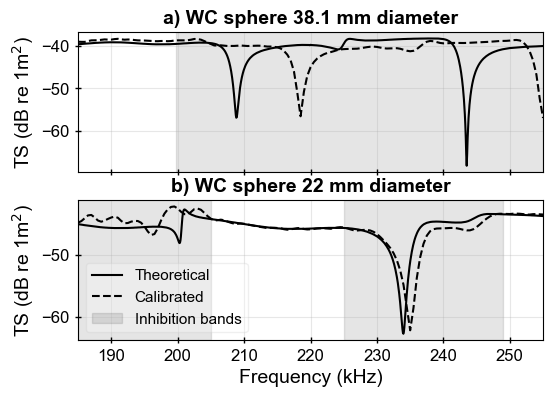

In [47]:
fig, [ax1,ax2] = plt.subplots(2,1,figsize=(6,4))


# plot calibrations and theoretical
ax1.plot(EKcal120_38['ref_freq']/1000, EKcal120_38['ref_ts'], 'k', label='Theoretical')
ax1.plot(Measured120_38.freqs, Measured120_38.TS,'k--', label='Calibrated')
#ax1.axvspan(EKcal120_22['freq'][0]/1000, EKcal120_22['freq'][-1]/1000, color='k', alpha=0.1, label='Inhibition bands')
ax1.axvspan(EKcal120_38['freq'][-5]/1000, EKcal120_38['ref_freq'][-1]/1000, color='k', alpha=0.1)
ax1.set_xlim([185,255])
ax1.set_xticklabels([])



ax1.grid(True, alpha=0.3)
ax1.set_title('a) WC sphere 38.1 mm diameter',fontsize=BIGGER_SIZE, fontweight='bold')
ax1.set_ylabel('TS (dB re 1m$^2$)')


ax2 = plt.subplot(2,1,2)
ax2.plot(EKcal120_22['ref_freq']/1000, EKcal120_22['ref_ts'], 'k', label='Theoretical')
ax2.plot(Measured120_22.freqs, Measured120_22.TS,'k--', label='Calibrated')
ax2.axvspan(185, 205, color='k', alpha=0.1, label='Inhibition bands')
ax2.axvspan(225, 249, color='k', alpha=0.1)
ax2.set_xlim([185,255])

ax2.grid(True, alpha=0.3)
ax2.set_title('b) WC sphere 22 mm diameter', fontsize=BIGGER_SIZE, fontweight='bold')
ax2.set_ylabel('TS (dB re 1m$^2$)')
ax2.legend(fontsize=11, loc='best', framealpha=0.3)
ax2.set_xlabel('Frequency (kHz)')

ax1.set_rasterized(True)
ax2.set_rasterized(True)

fig.savefig(savefigs_path+'calibration_200.jpg', dpi=300, format='jpg', facecolor='w', bbox_inches='tight')
size = fig.get_size_inches()

In [16]:
EKcal120_38['freq'][-1]

203638.0

# 200 kHz

In [17]:
EKcal38_38 = readxml_cal('G:/AFKABAN/2023_NyÅ_Calibrations/WBAT_279950_taped/38/CalibrationDataFile-38kHz-38mm-210123-D20230127-T121344.xml')


Text(0.5, 0, 'Frequency (Hz)')

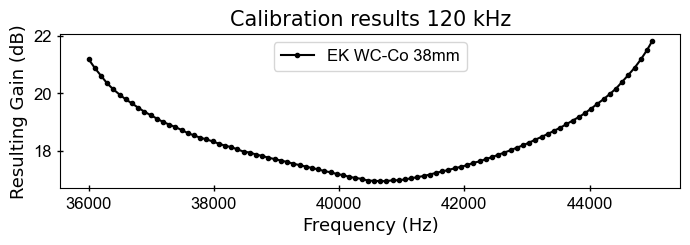

In [18]:
plt.figure(figsize=(8,2))

plt.plot(EKcal38_38['freq'],EKcal38_38['gain'], 'k.-',label='EK WC-Co 38mm')
plt.legend()
plt.title('Calibration results 120 kHz',title_font)
plt.ylabel('Resulting Gain (dB)',axis_font)
plt.xlabel('Frequency (Hz)',axis_font)

In [19]:
for params in ['freq','gain','minor_bw','major_bw','minor_ao','major_ao']:
    print(params)
    print(np.array2string(EKcal38_38[params], separator=";"))

freq
[36000.;36099.;36198.;36297.;36396.;36495.;36594.;36693.;36792.;36891.;
 36990.;37090.;37189.;37288.;37387.;37486.;37585.;37684.;37783.;37882.;
 37981.;38081.;38180.;38279.;38378.;38477.;38576.;38675.;38774.;38873.;
 38972.;39072.;39171.;39270.;39369.;39468.;39567.;39666.;39765.;39864.;
 39963.;40063.;40162.;40261.;40360.;40459.;40558.;40657.;40756.;40855.;
 40954.;41054.;41153.;41252.;41351.;41450.;41549.;41648.;41747.;41846.;
 41945.;42045.;42144.;42243.;42342.;42441.;42540.;42639.;42738.;42837.;
 42936.;43036.;43135.;43234.;43333.;43432.;43531.;43630.;43729.;43828.;
 43927.;44027.;44126.;44225.;44324.;44423.;44522.;44621.;44720.;44819.;
 44918.;45000.]
gain
[21.2 ;20.89;20.62;20.35;20.14;19.96;19.79;19.65;19.5 ;19.36;19.24;19.12;
 19.  ;18.91;18.82;18.72;18.61;18.53;18.45;18.39;18.32;18.24;18.17;18.12;
 18.04;17.96;17.93;17.86;17.81;17.75;17.7 ;17.65;17.6 ;17.54;17.49;17.44;
 17.39;17.34;17.28;17.24;17.18;17.14;17.08;17.04;17.01;16.95;16.94;16.93;
 16.93;16.96;16.96;16.99;17.03

In [20]:
Measured38_38 = pd.read_csv('G:/AFKABAN/2023_NyÅ_Calibrations/WBAT_279950_taped/38/TSspectra_38_38.csv',skiprows=14,header=None, usecols=[0,1], names=['freqs', 'TS'])

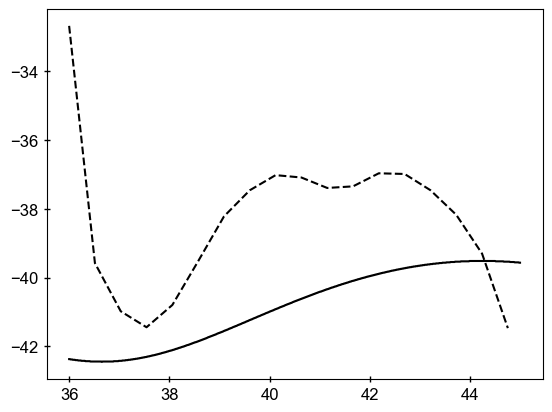

In [21]:

# plot calibrations and theoretical
plt.plot(EKcal38_38['ref_freq']/1000, EKcal38_38['ref_ts'], 'k', label='Theoretical')
plt.plot(Measured38_38.freqs, Measured38_38.TS,'k--', label='Calibrated')